# Amazon Sentiment Analysis

## Author: Daniel Antantis

In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [167]:
reviews = pd.read_csv("amazon_reviews.csv")
reviews.head()

/Users/danielantantis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [168]:
reviews = reviews.dropna(subset = ['reviews.text', 'reviews.rating'])

In [169]:
clean_reviews = reviews[['name', 'reviews.rating', 'reviews.text']].rename(columns = {'reviews.rating' : 'rating', 'reviews.text': 'text'})
clean_reviews.head()

,name,rating,text
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,This product so far has not disappointed. My c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great for beginner or experienced person. Boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,Inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,I've had my Fire HD 8 two weeks now and I love...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,I bought this for my grand daughter when she c...


In [170]:
len(clean_reviews)

34626

In [171]:
# Add sentiment column (1 = positive | 0 = negative)
clean_reviews['sentiments'] = clean_reviews.rating.apply(lambda x: 0 if x in [1, 2] else 1)
clean_reviews.head()

,name,rating,text,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,This product so far has not disappointed. My c...,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great for beginner or experienced person. Boug...,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,Inexpensive tablet for him to use and learn on...,1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,I bought this for my grand daughter when she c...,1


In [172]:
# Clean text by making all the text lowercase
clean_reviews['text'] = clean_reviews['text'].str.lower()
clean_reviews.head()

,name,rating,text,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,this product so far has not disappointed. my c...,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great for beginner or experienced person. boug...,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,inexpensive tablet for him to use and learn on...,1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,i've had my fire hd 8 two weeks now and i love...,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,i bought this for my grand daughter when she c...,1


In [173]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
clean_reviews['text'] = clean_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
clean_reviews.head()

,name,rating,text,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,product far disappointed. children love use li...,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great beginner experienced person. bought gift...,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,"inexpensive tablet use learn on, step nabi. th...",1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,i've fire hd 8 two weeks love it. tablet great...,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,"bought grand daughter comes visit. set user, e...",1


In [174]:
clean_reviews['text'] = clean_reviews['text'].str.replace('[^\w\s]','')
clean_reviews.head()

/var/folders/y_/ssfyhqrn347ccbvjy06dxmcr0000gn/T/ipykernel_4726/144381297.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_reviews['text'] = clean_reviews['text'].str.replace('[^\w\s]','')


,name,rating,text,sentiments
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,product far disappointed children love use lik...,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,great beginner experienced person bought gift ...,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,inexpensive tablet use learn on step nabi thri...,1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",4.0,ive fire hd 8 two weeks love it tablet great v...,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5.0,bought grand daughter comes visit set user ent...,1


In [175]:
clean_reviews['text'] = clean_reviews['text'].astype(str)

In [176]:
X = clean_reviews['text']
y = clean_reviews['sentiments']

<AxesSubplot:xlabel='rating', ylabel='count'>

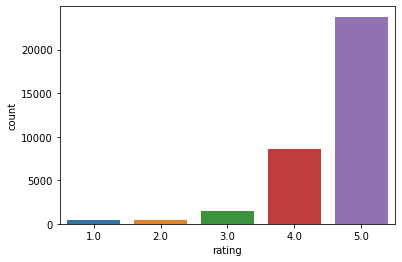

In [177]:
sns.countplot(x=clean_reviews['rating'])

In [178]:
clean_reviews['rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64

In [179]:
clean_reviews['sentiments'].value_counts()

1    33814
0      812
Name: sentiments, dtype: int64

## Logistic Regression w/ TF-IDF Vectorization

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.4, random_state=2023)

In [181]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [182]:
lr_model = LogisticRegression().fit(X_train_vect, y_train)

In [183]:
lr_score = lr_model.score(X_test_vect, y_test)
print(lr_score)

0.9768969749476573


In [184]:
lr_pred = lr_model.predict(X_test_vect)

In [185]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print(tn, fp, fn, tp)

5 318 2 13526


In [186]:
precision = round(tp/(tp + fp), 3)
recall = round(tp/(tp+fn), 3)
print(precision)
print(recall)

0.977
1.0


## K-Nearest Neighbors

In [187]:
knn = KNeighborsClassifier()

In [188]:
knn_tune_grid = {'n_neighbors': [3, 5, 7, 10, 12]}

In [189]:
knn_search = GridSearchCV(knn, knn_tune_grid, cv=3)
knn_search_results = knn_search.fit(X_train_vect, y_train)

In [190]:
print(knn_search_results.best_score_)
print(knn_search_results.best_params_)

0.9764620938628159
{'n_neighbors': 10}


In [191]:
knn_12 = KNeighborsClassifier(n_neighbors=12)
knn_12.fit(X_train_vect, y_train)

KNeighborsClassifier(n_neighbors=12)

In [192]:
knn_score = knn_12.score(X_test_vect, y_test)
print(knn_score)

0.9768969749476573


In [193]:
knn_pred = knn_12.predict(X_test_vect)

In [194]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print(tn, fp, fn, tp)

3 320 0 13528


In [195]:
precision_knn = round(tp/(tp + fp), 3)
recall_knn = round(tp/(tp+fn), 3)
print(precision_knn)
print(recall_knn)

0.977
1.0


In [196]:
full_vect = vectorizer.transform(clean_reviews['text'])

In [197]:
knn_full_pred = knn_12.predict(full_vect)

## Default Threshold (0.5)

Need to find a better way to add decision threshold to the tuning grid so that it is apart of the cross-validation

In [198]:
threshold = 0.5
prob_test_5 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [199]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_5).ravel()
print(tn, fp, fn, tp)

3 320 0 13528


In [200]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.977
1.0
0.009


## Increased Threshold

In [201]:
threshold = 0.7
prob_test_7 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [202]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_7).ravel()
print(tn, fp, fn, tp)

23 300 12 13516


In [203]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.978
0.999
0.071


In [204]:
threshold = 0.75
prob_test_75 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [205]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_75).ravel()
print(tn, fp, fn, tp)

54 269 109 13419


In [206]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.98
0.992
0.167


In [218]:
threshold = 0.8
prob_test_8 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [219]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_8).ravel()
print(tn, fp, fn, tp)

54 269 109 13419


In [220]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.98
0.992
0.167


In [215]:
threshold = 0.85
prob_test_85 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [216]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_85).ravel()
print(tn, fp, fn, tp)

134 189 1075 12453


In [217]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.985
0.921
0.415


In [224]:
threshold = 0.9
prob_test_9 = np.where(knn_12.predict_proba(X_test_vect)[:, 1] > threshold, 1, 0)

In [225]:
tn, fp, fn, tp = confusion_matrix(y_test, prob_test_9).ravel()
print(tn, fp, fn, tp)

134 189 1075 12453


In [226]:
precision_test = round(tp/(tp + fp), 3)
sensitivity_test = round(tp/(tp+fn), 3)
specificity_test = round(tn/(tn+fp), 3)
print(precision_test)
print(sensitivity_test)
print(specificity_test)

0.985
0.921
0.415


In the end it appears that thresholds of 0.85 and 0.9 appear to yield the most ideal metrics but we'll go with 0.85

## Test New Threshold on Dataset

In [247]:
best_threshold = 0.85
prob_full_85 = np.where(knn_12.predict_proba(full_vect)[:, 1] > best_threshold, 1, 0)

In [248]:
tn, fp, fn, tp = confusion_matrix(clean_reviews['sentiments'], prob_full_85).ravel()
print(tn, fp, fn, tp)

620 192 2507 31307


In [249]:
precision_full = round(tp/(tp + fp), 3)
sensitivity_full = round(tp/(tp+fn), 3)
specificity_full = round(tn/(tn+fp), 3)
print(precision_full)
print(sensitivity_full)
print(specificity_full)

0.994
0.926
0.764


## Try to Improve Data

In [250]:
pred_reviews = clean_reviews.copy()
pred_reviews['pred'] = prob_full_85

In [251]:
incorrect = pred_reviews[pred_reviews['sentiments'] != pred_reviews['pred']]
incorrect['sentiments'].value_counts()

1    2507
0     192
Name: sentiments, dtype: int64

The model appears to incorrecttly predict positive sentiments more often than negative sentiments, however overall the model only incorrectly predicts 7.41% of all positive sentiments (2507/33814) and 23.6% (192/812) of all negative sentiments. The next goal is try and increase the models ability to correctly predict negative sentiments without a significant reduction in its ability to predict positive sentiments.